# Ensemble methods: bagging, boosting and stacking
Understanding the key concepts of ensemble learning.

What are ensemble methods?

Ensemble learning is a machine learning paradigm where multiple models (often called “weak learners”) are trained to solve the same problem and combined to get better results. The main hypothesis is that when weak models are correctly combined we can obtain more accurate and/or robust models.

# Errors in Machine Learning

We can describe an error as an action which is inaccurate or wrong. In Machine Learning, error is used to see how accurately our model can predict on data it uses to learn; as well as new, unseen data. Based on our error, we choose the machine learning model which performs best for a particular dataset.

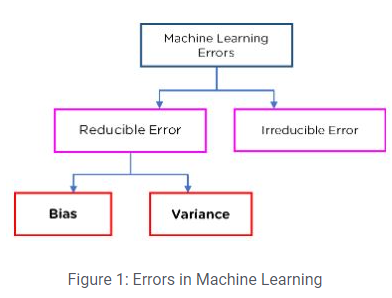

    Bias: Error in prediction ==> Leads to Uderfitting
    Variance: Model’s sensitivity to fluctuations in the data ==> Leads to overfitting

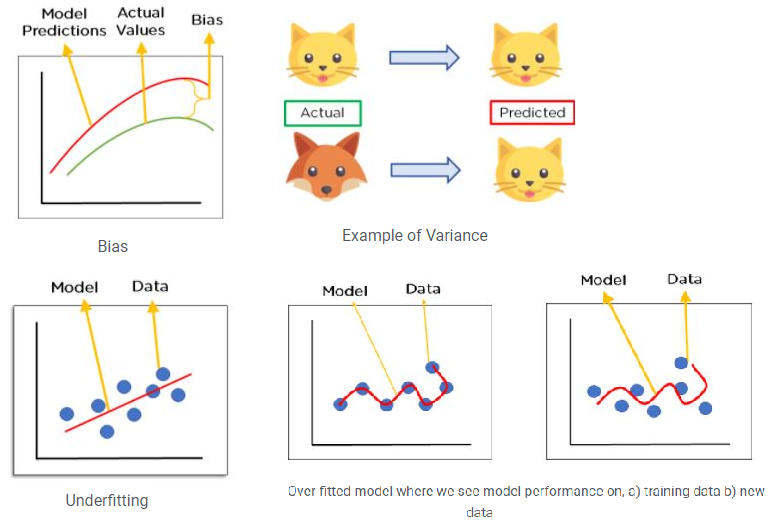

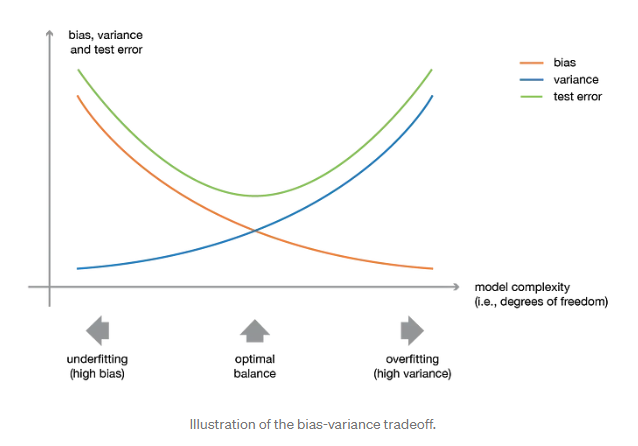

We can combine multiple models into a single model to reduce these errors and improve predictions. This is called ensemble learning

## Summary
    -Ensemble methods aim at improving predictability in models by combining several models to make one very reliable model.
    -The most popular ensemble methods are boosting, bagging, and stacking.
    -Ensemble methods are ideal for regression and classification, where they reduce bias and variance to boost the accuracy of models.

# Bagging

In [1]:
#Let's implement Bagging on diabetes dataset: Problem Statement: Predicting one has diabetes or not?
import pandas as pd
df = pd.read_csv("diabetes.csv")

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# Lets select dependent and independent features
X = df.drop("Outcome",axis="columns")
y = df.Outcome

In [5]:
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [6]:
##Dataset Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled[:3]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                stratify=y, random_state=10)

In [9]:
X_train.shape

(576, 8)

In [10]:
X_test.shape

(192, 8)

In [11]:
#Model building using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
#We will use k-fold cross-validation to build our decision tree classifier.
#Cross_val_score is a function in the scikit-learn package which trains and 
#tests a model over multiple folds of your dataset.
#This cross validation method gives you a better understanding of model
#performance over the whole dataset
#instead of just a single train/test split.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores

array([0.72727273, 0.66233766, 0.68181818, 0.80392157, 0.7254902 ])

In [13]:
#Getting the Mean Accuracy Score
scores.mean()

0.7201680672268906

In [14]:
#Implementing the Bagging algorithms
#The BaggingClassifier classifier will follow all the bagging steps and build an optimized model. 
#The BaggingClassifier will fit the weak/base learners on the randomly sampled subsets.
#Next, it will use the voting techniques to produce an aggregated final model.
#Finally, we will use the DecisionTreeClassifier algorithm as our weak/base learners.
from sklearn.ensemble import BaggingClassifier

In [15]:
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=100, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)

In [16]:
# fit the model
bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [17]:
# Accuracy
bag_model.oob_score_

0.7534722222222222

In [18]:
#We can also check the accuracy score using the testing dataset to determine if our model is overfitting. 
bag_model.score(X_test, y_test)

0.7760416666666666

In [19]:
#The accuracy score shows that our model is not overfitting. 
#Overfitting occurs when we get a lower accuracy when using the testing dataset.

#  In the similar way you can use the AdaBoosting Classifier, GradientBoostingClassifier.

# Boosting

The first-ever boosting algorithm was called AdaBoost (Adaptive Boosting) was introduced to the world by Freund and Schapire. 


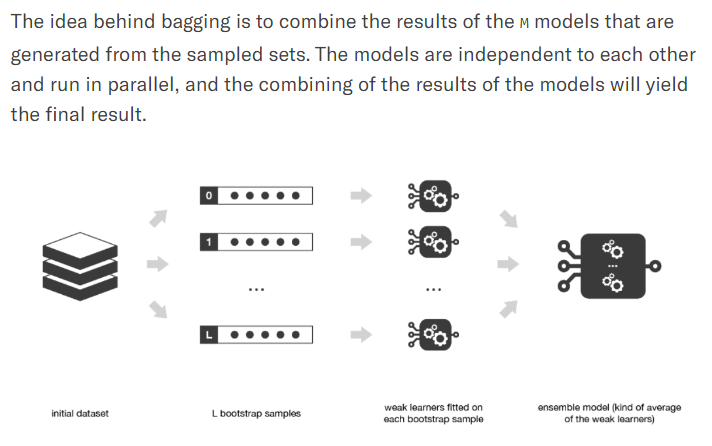

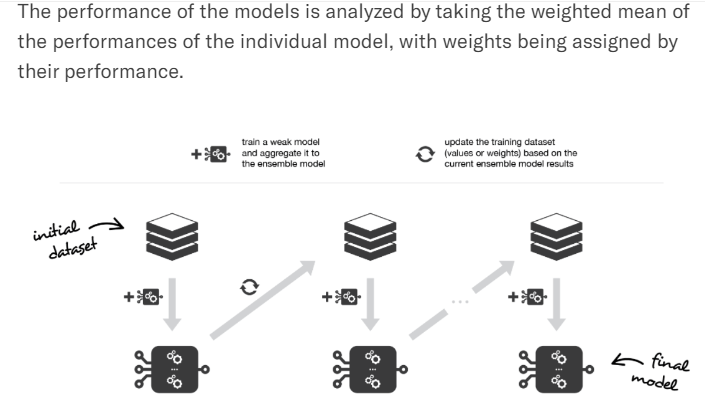

In [20]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
import numpy as np
import pandas as pd
import sklearn
import xgboost

The code uses the UCI Machine Learning Mushroom Dataset to implement the AdaBoost algorithms. For the set of features in the dataset, the task is to identify whether the type of mushroom is poisonous or edible.

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [23]:
df = pd.read_csv("mushrooms.csv")
#print(df.head())
for col in df.columns:
    print('Unique value count of', col, 'is', len(df[col].unique()))

Unique value count of class is 2
Unique value count of cap-shape is 6
Unique value count of cap-surface is 4
Unique value count of cap-color is 10
Unique value count of bruises is 2
Unique value count of odor is 9
Unique value count of gill-attachment is 2
Unique value count of gill-spacing is 2
Unique value count of gill-size is 2
Unique value count of gill-color is 12
Unique value count of stalk-shape is 2
Unique value count of stalk-root is 5
Unique value count of stalk-surface-above-ring is 4
Unique value count of stalk-surface-below-ring is 4
Unique value count of stalk-color-above-ring is 9
Unique value count of stalk-color-below-ring is 9
Unique value count of veil-type is 1
Unique value count of veil-color is 4
Unique value count of ring-number is 3
Unique value count of ring-type is 5
Unique value count of spore-print-color is 9
Unique value count of population is 6
Unique value count of habitat is 7


In [24]:
df.shape

(8124, 23)

As you can see Unique value count of veil-type is 1, the feature veil-type has only one distinct value in it and hence, can be dropped.

In [25]:
df = df.drop("veil-type", axis=1)

In [26]:
df.head(6)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,s,w,w,w,o,p,k,n,g


In [27]:
# Data is categorical, lets convert it in numerical value
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

In [28]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [29]:
# Splitting the dataset into target and feature sets
X = df.loc[:, df.columns != 'class']
Y = df['class']

In [30]:
print(X.shape)

(8124, 21)


In [31]:
print(Y.shape)

(8124,)


In [32]:
## Scaling the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state = 100)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# AdaBoost

AdaBoost, short for Adaptive Boosting, was one of the first boosting methods that saw success in improving the performance of models. AdaBoost focuses on enhancing the performance in areas where the base learner fails. A base learner is the first iteration of the model.

AdaBoost is resistant to overfitting as the number of iterations increase and are most effective when it works on a binary classification problem. AdaBoost includes an extra condition where a model is required to have an error of less than 50% to maintain it, otherwise, the iterations are repeated until a better learner is generated.

AdaBoostClassifier Function in python has following parameters:
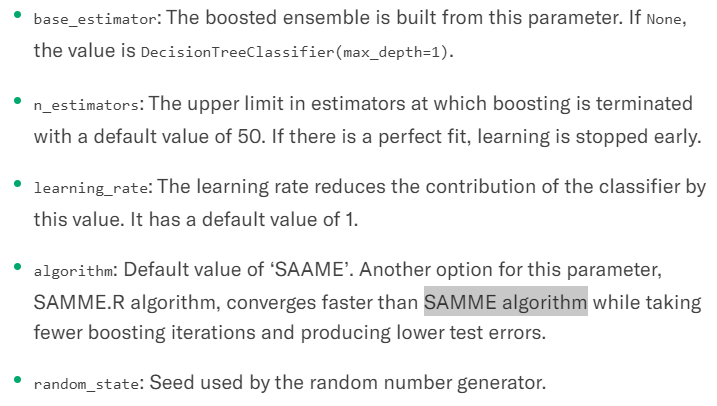

Refer this link for  SAMME and SAMME.R 
https://medium.datadriveninvestor.com/understanding-adaboost-and-scikit-learns-algorithm-c8d8af5ace10

In [33]:
adaboost = AdaBoostClassifier(n_estimators = 10, learning_rate = 0.01).fit(X_train, Y_train)
score = adaboost.score(X_test, Y_test)

In [34]:
score

0.7842493847415914